## Dimensionality Reduction

In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
# from tensorflow.keras.utils import img_to_array
from keras.applications.vgg16 import preprocess_input
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
# Define the base directory where the image data is located
base_dir = TRAIN_PATH

# Define the image size and batch size
img_size = (48, 48)
batch_size = 32

# Define a function to extract features from an image using a pre-trained CNN
def extract_features(img_path):
    # Load the image and resize it to the target size
    img = image.load_img(img_path, target_size=img_size)
    # Convert the image to a numpy array
    x = image.img_to_array(img)
    # Preprocess the input data for the pre-trained CNN
    x = preprocess_input(x)
    # Expand the dimensions of the array to match the expected input format for the CNN
    x = np.expand_dims(x, axis=0)
    # Use the pre-trained CNN to extract features from the image
    features = model.predict(x)
    # Flatten the features into a 1D array
    features = features.flatten()
    return features

In [ ]:
# Define the pre-trained CNN to use for feature extraction
model = keras.applications.VGG16(include_top=False, weights='imagenet')

In [ ]:
# Extract features from all images in the dataset
all_features = []
all_labels = []
for class_name in os.listdir(base_dir):
    class_dir = os.path.join(base_dir, class_name)
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        features = extract_features(img_path)
        all_features.append(features)
        all_labels.append(class_name)

# Convert the features and labels to numpy arrays
all_features = np.array(all_features)
all_labels = np.array(all_labels)


In [ ]:

# Use PCA to reduce the dimensionality of the features to 2D
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(all_features)


1/1 [==============================] - 0s 29ms/step


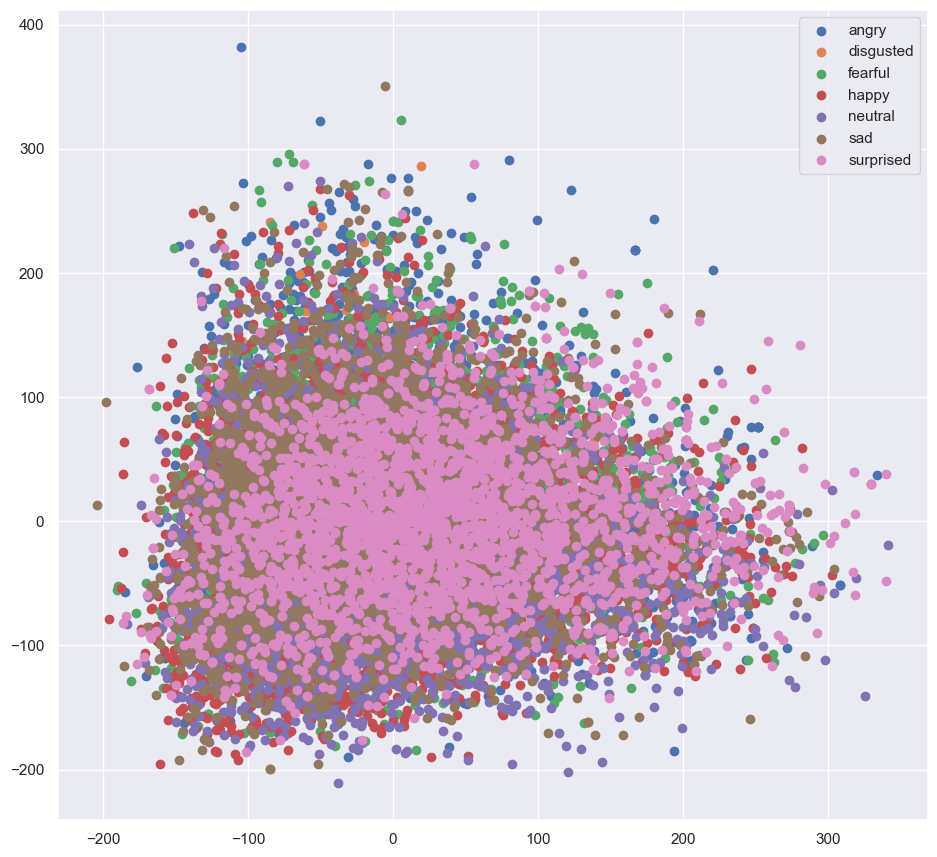

In [ ]:
# Plot the reduced features in a scatter plot, with each class represented by a different color
plt.figure(figsize=(10, 10))
for class_name in np.unique(all_labels):
    mask = all_labels == class_name
    plt.scatter(reduced_features[mask, 0], reduced_features[mask, 1], label=class_name)
plt.legend()
plt.show()
